# Covid19 Analysis

In [79]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
# sns.set(rc={'figure.figsize':(15, 8)})
plt.rcParams["figure.figsize"] = (15,8)

In [80]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

In [81]:
rFact = 7

# Statewise analysis

In [82]:
response = requests.get("https://api.covid19india.org/v4/min/timeseries.min.json")
data = response.json()
print(response.status_code)

200


In [83]:
# print(data['TN']['dates'].keys())

In [84]:
data['TN']['dates']['2021-05-24'].keys()

dict_keys(['delta', 'delta7', 'total'])

In [85]:
data['TN']['dates']['2021-05-24']['delta']

{'confirmed': 34867,
 'deceased': 404,
 'recovered': 27026,
 'tested': 168194,
 'vaccinated': 82627}

In [86]:
def getDataStCt(data, date, state):
    
    try:
        dat = data[state]['dates'][date]['delta']
        return dat['confirmed']
    except:
        print(date)
        return 0
getDataStCt(data, '2021-05-24', 'TN')    

34867

In [87]:
def getDataStDt(data, date, state):
    
    try:
        dat = data[state]['dates'][date]['delta']
        return dat['deceased']
    except:
        return 0
getDataStDt(data, '2021-05-24', 'TN')  

404

In [88]:
def getDataStCtot(data, date, state):
    dat = data[state]['dates'][date]['total']
    return dat['confirmed']
getDataStCtot(data, '2021-05-24', 'TN')   

1877211

In [89]:
def getDataStDtot(data, date, state):
    dat = data[state]['dates'][date]['total']
    try:
        return dat['deceased']
    except:
        return 0
getDataStDtot(data, '2021-05-24', 'TN')  

20872

# Mortality

In [90]:
dates = list(data['TN']['dates'].keys())[-(90+rFact):]
# dates

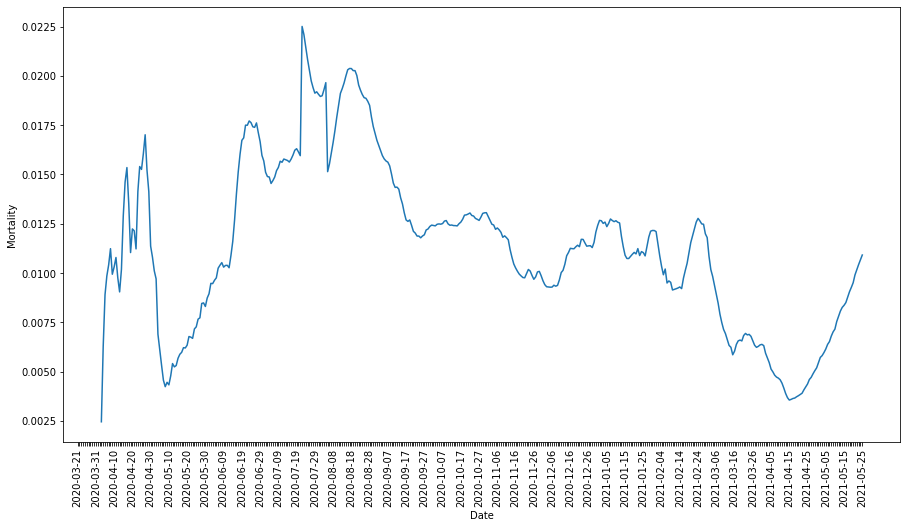

In [91]:
state = 'TN'
dates = list(data[state]['dates'].keys())[14:]
dect = [getDataStDt(data, d, state) for d in dates]
confct = [getDataStCt(data, d, state) for d in dates]
df = pd.DataFrame(list(zip(dates, dect, confct)),
           columns =['Date', 'deceased', 'Confirmed cases'])
df['ravgD'] = df['deceased'].rolling(rFact+7).mean()
df['ravgC'] = df['Confirmed cases'].rolling(rFact+7).mean()
df['Mortality'] = df['ravgD'] / df['ravgC'] 
ax = sns.lineplot(x="Date", y='Mortality', data=df)
plt.xticks(rotation=90)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
    if ind == len(dates)-1:
        label.set_visible(True)
del(df)

(439, 439)

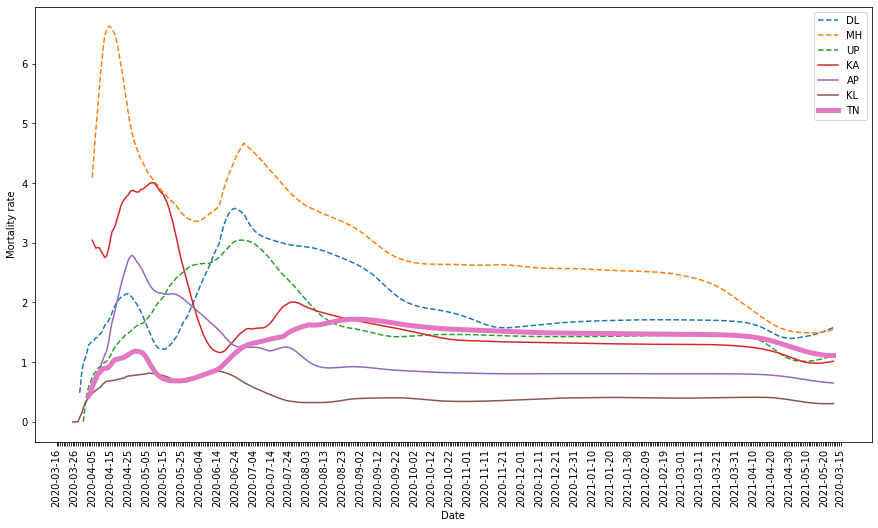

In [92]:
def martalityPlot(state, linw = 1.5, linestyle='-'):
    dates = list(data[state]['dates'].keys())[14:]
    dect = [getDataStDtot(data, d, state) for d in dates]
    confct = [getDataStCtot(data, d, state) for d in dates]
    df = pd.DataFrame(list(zip(dates, dect, confct)),
               columns =['Date', 'deceased', 'Confirmed cases'])
    df['ravgD'] = df['deceased'].rolling(rFact+7).mean()
    df['ravgC'] = df['Confirmed cases'].rolling(rFact+7).mean()
    df['Mortality rate'] = 100*df['ravgD'] / df['ravgC'] 

    ax = sns.lineplot(x="Date", y='Mortality rate', data=df, label = state, linewidth = linw, linestyle = linestyle)
    plt.xticks(rotation=90)

    return ax
dates = list(data['TN']['dates'].keys())[65:]



martalityPlot('DL', 1.5,'--')
martalityPlot('MH', 1.5,'--')
martalityPlot('UP', 1.5,'--')
martalityPlot('KA')
martalityPlot('AP')
martalityPlot('KL')
ax = martalityPlot('TN', 5)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
    if ind == len(dates)+ 59:
        label.set_visible(True)
ind, len(dates) +  59

2020-03-16
2020-03-24
2020-12-31
2021-02-22
2021-03-13
2020-03-14
2020-03-17
2020-03-18
2020-05-01
2020-05-03
2020-05-04
2020-05-06
2020-05-07


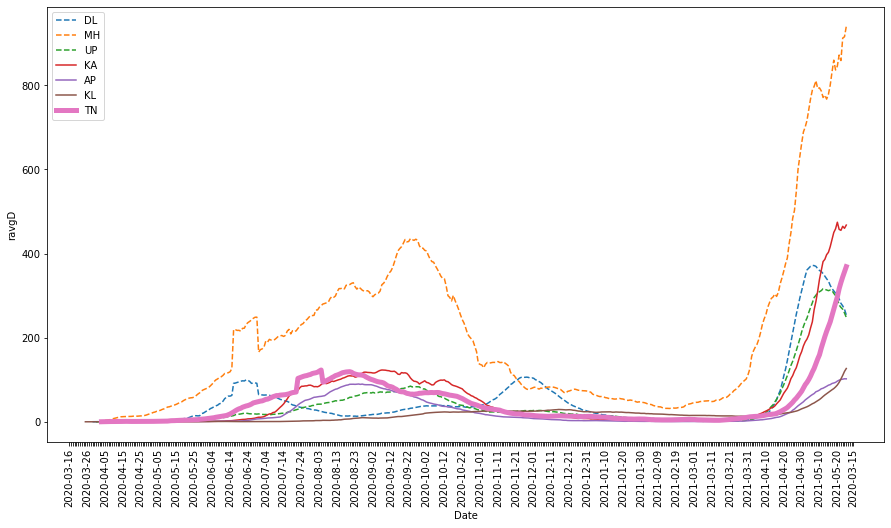

In [93]:
def martalityVPlot(state, linw = 1.5, linestyle='-'):
    dates = list(data[state]['dates'].keys())[14:]
    dect = [getDataStDt(data, d, state) for d in dates]
    confct = [getDataStCt(data, d, state) for d in dates]
    df = pd.DataFrame(list(zip(dates, dect, confct)),
               columns =['Date', 'deceased', 'Confirmed cases'])
    df['ravgD'] = df['deceased'].rolling(rFact+7).mean()
    df['ravgC'] = df['Confirmed cases'].rolling(rFact+7).mean()
    df['Mortality rate'] = 100*df['ravgD'] / df['ravgC'] 

    ax = sns.lineplot(x="Date", y='ravgD', data=df, label = state, linewidth = linw, linestyle = linestyle)
    plt.xticks(rotation=90)

    return ax
dates = list(data['TN']['dates'].keys())[100:]



martalityVPlot('DL', 1.5,'--')
martalityVPlot('MH', 1.5,'--')
martalityVPlot('UP', 1.5,'--')
martalityVPlot('KA')
martalityVPlot('AP')
martalityVPlot('KL')
ax = martalityVPlot('TN', 5)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
    if ind == len(dates)+ 94:
        label.set_visible(True)


# Confirmed cases

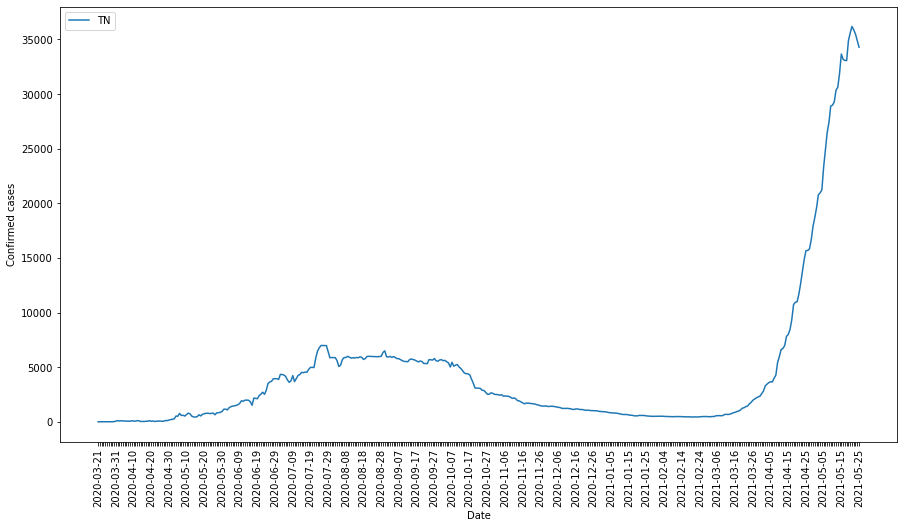

In [94]:
def statePlot(state):
    dates = list(data['TN']['dates'].keys())[14:]
    confct = [getDataStCt(data, d, state) for d in dates]
    df = pd.DataFrame(list(zip(dates, confct)),
               columns =['Date', 'Confirmed cases'])
    ax = sns.lineplot(x="Date", y='Confirmed cases', data=df, label = state)
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 10 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)

    plt.xticks(rotation=90)
#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.bar(dates,confct)
state = 'TN'
statePlot(state)

2020-12-31
2021-02-22
2021-03-13


(373, 380)

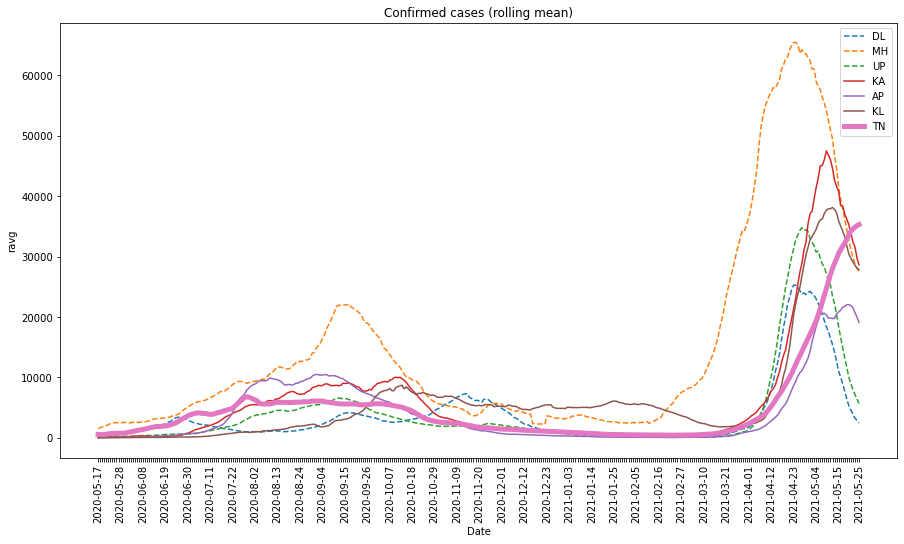

In [95]:
def stateRavgPlot(state, linw = 1.5, linestyle='-'):
    
    confct = [getDataStCt(data, d, state) for d in dates]
    df = pd.DataFrame(list(zip(dates, confct)),
               columns =['Date', 'Confirmed cases'])
    df['ravg'] = df['Confirmed cases'].rolling(rFact).mean()
    
    df = df[6:]
#     ax = sns.barplot(x="Date", y='Confirmed cases', data=df)

    ax = sns.lineplot(data=df, x="Date", y='ravg', label = state, linewidth = linw, linestyle = linestyle)


    
    plt.xticks(rotation=90)
    return ax, df
#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.bar(dates,confct)
state = 'TN'
dates = list(data['TN']['dates'].keys())[65:]


stateRavgPlot('DL', 1.5,'--')
stateRavgPlot('MH', 1.5,'--')
stateRavgPlot('UP', 1.5,'--')
stateRavgPlot('KA')
stateRavgPlot('AP')
stateRavgPlot('KL')
ax, df = stateRavgPlot('TN', 5)
plt.title('Confirmed cases (rolling mean)')
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 11 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
    if ind == len(dates)-7:
        label.set_visible(True)
ind, len(dates) 

In [96]:
df[:-1]

,Date,Confirmed cases,ravg
6,2020-05-17,639,574.285714
7,2020-05-18,536,536.857143
8,2020-05-19,688,532.857143
9,2020-05-20,743,566.285714
10,2020-05-21,776,613.285714
...,...,...,...
374,2021-05-20,35579,33617.000000
375,2021-05-21,36184,34230.142857
376,2021-05-22,35873,34546.571429
377,2021-05-23,35483,34875.428571


In [97]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import warnings
warnings.filterwarnings('ignore')


In [98]:
data = df
# data = data.dropna(axis='rows')
# data = data.reindex(range(373))
data = data.reset_index(drop=True)

Text(0.5, 0, 'DAte')

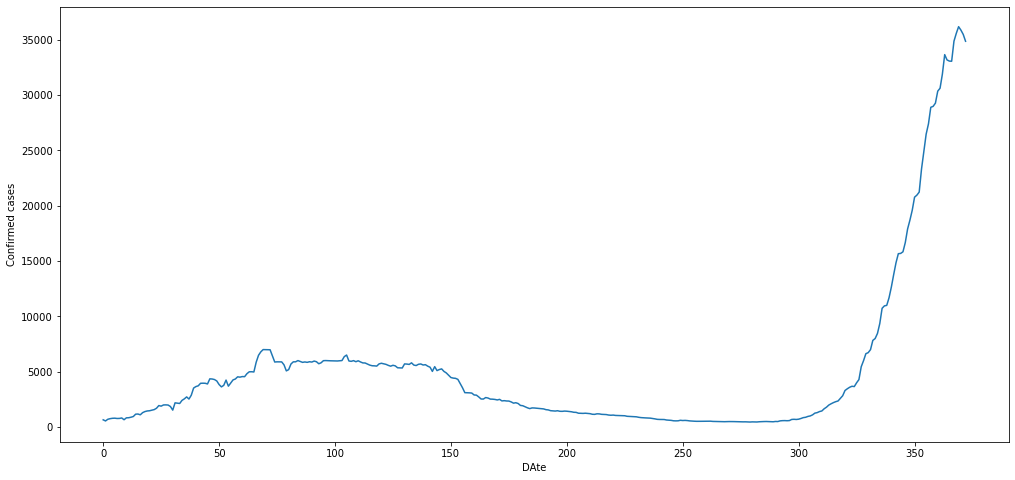

In [99]:
data = df[:-1]
data = data.reset_index(drop=True)

plt.figure(figsize=(17, 8))
plt.plot(data['Confirmed cases'])

plt.ylabel('Confirmed cases')
plt.xlabel('DAte')

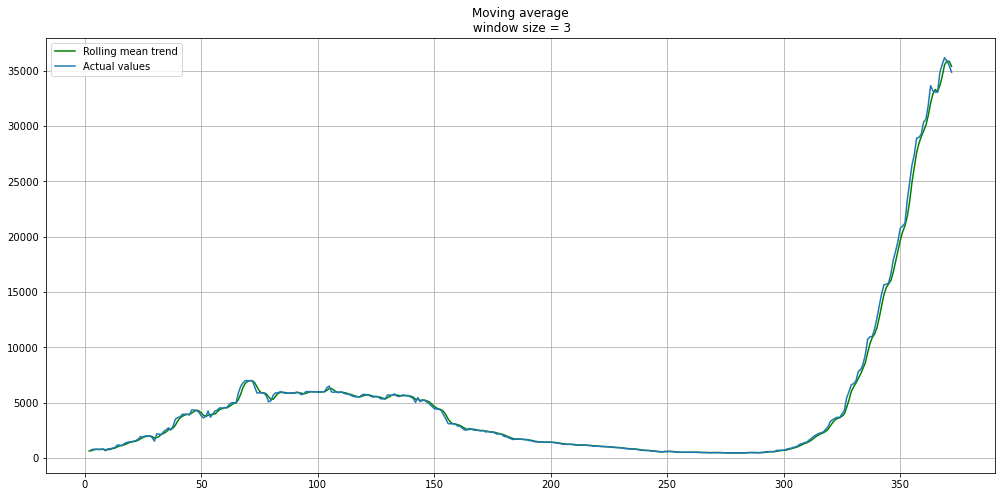

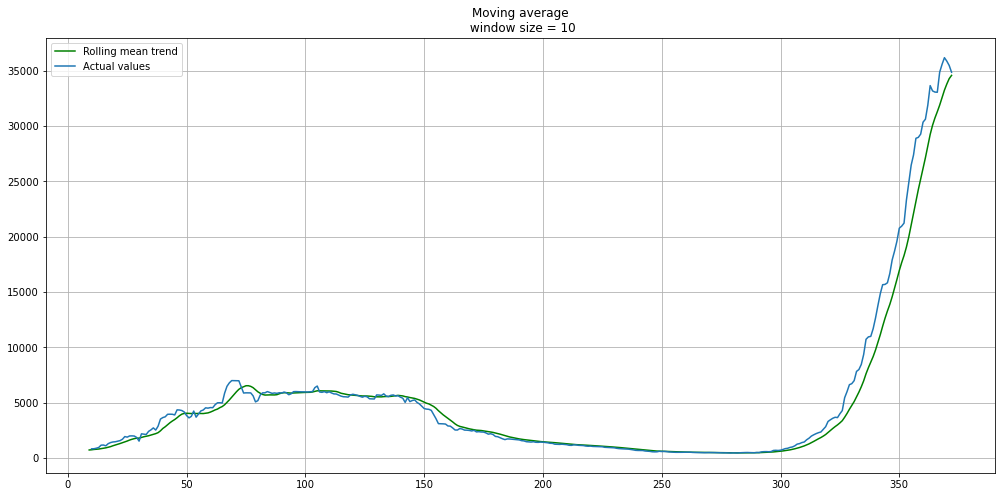

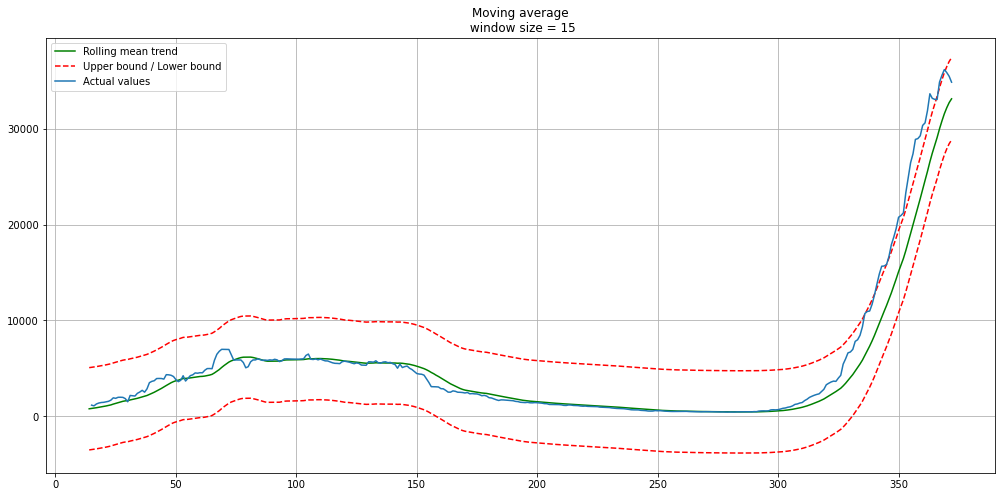

In [100]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
#Smooth by the previous 5 days (by week)
plot_moving_average(data['Confirmed cases'], 3)

#Smooth by the previous month (30 days)
plot_moving_average(data['Confirmed cases'], 10)

#Smooth by previous quarter (90 days)
plot_moving_average(data['Confirmed cases'], 15, plot_intervals=True)

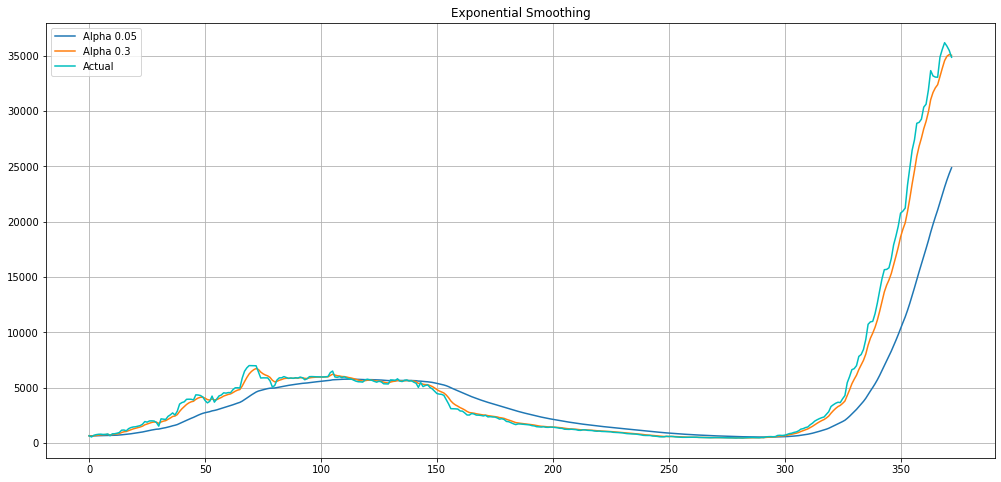

In [101]:
def exponential_smoothing(series, alpha):

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result
  
def plot_exponential_smoothing(series, alphas):
 
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);

plot_exponential_smoothing(data['Confirmed cases'], [0.05, 0.3])

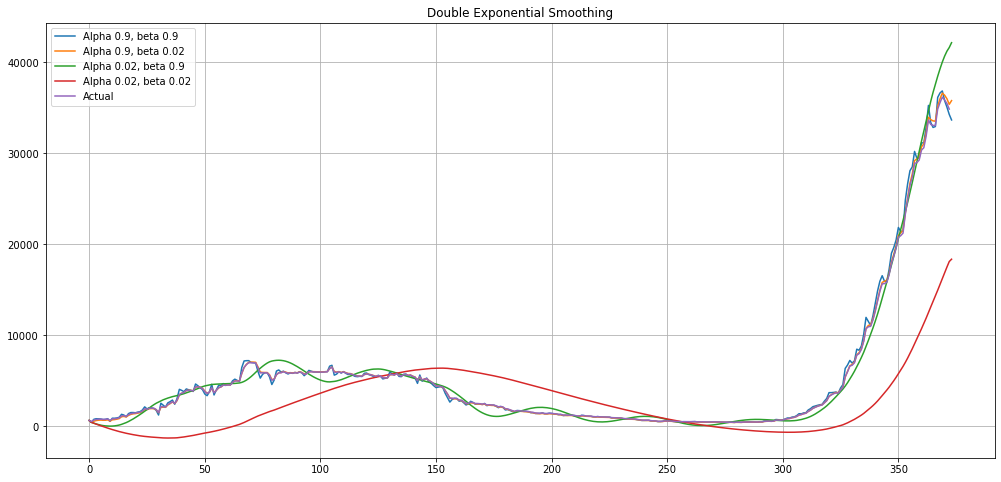

In [102]:
def double_exponential_smoothing(series, alpha, beta):

    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
     
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)
    
plot_double_exponential_smoothing(data['Confirmed cases'], alphas=[0.9, 0.02], betas=[0.9, 0.02])

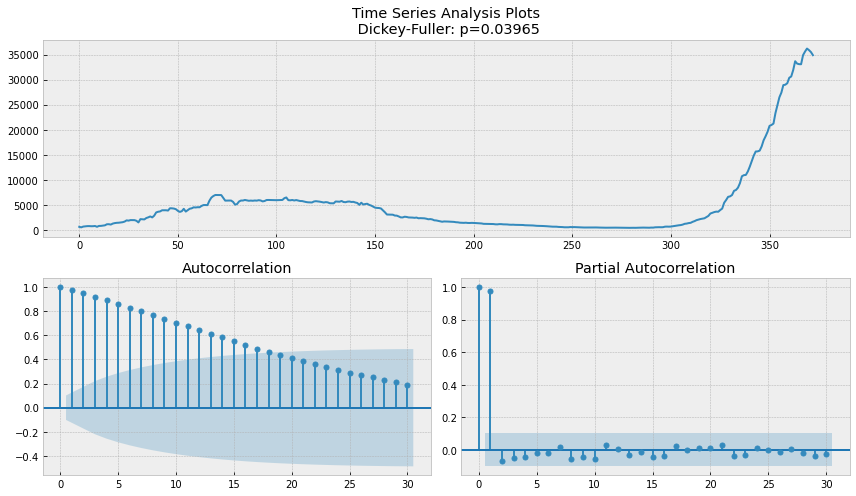

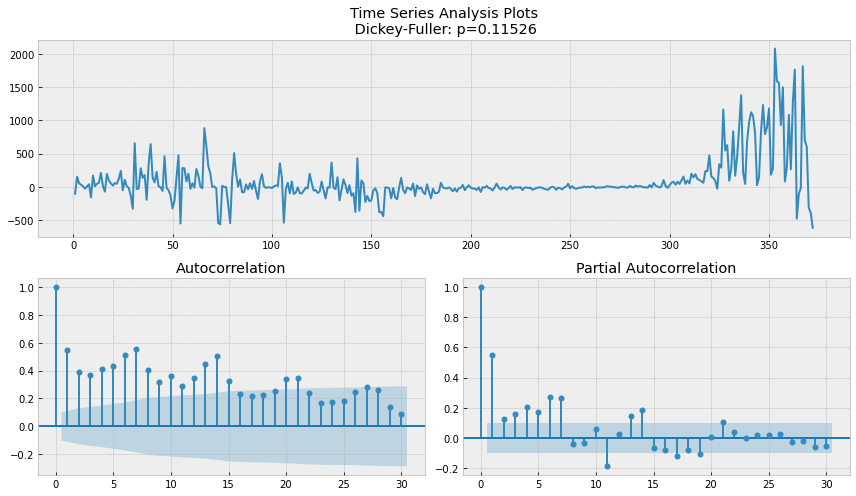

In [103]:
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(data['Confirmed cases'], lags=30)

# Take the first difference to remove to make the process stationary
data_diff = data['Confirmed cases'] - data['Confirmed cases'].shift(1)

tsplot(data_diff[1:], lags=30)

In [104]:
# Import Prophet
from fbprophet import Prophet
import logging

In [105]:
logging.getLogger().setLevel(logging.ERROR)
data

,Date,Confirmed cases,ravg
0,2020-05-17,639,574.285714
1,2020-05-18,536,536.857143
2,2020-05-19,688,532.857143
3,2020-05-20,743,566.285714
4,2020-05-21,776,613.285714
...,...,...,...
368,2021-05-20,35579,33617.000000
369,2021-05-21,36184,34230.142857
370,2021-05-22,35873,34546.571429
371,2021-05-23,35483,34875.428571


In [106]:
data['Date'] = pd.to_datetime(data['Date'])
datan = data[['Date', 'Confirmed cases']]
for col in datan.iloc[:,2:].columns:
    if datan[col].dtypes == object:
        datan[col] = datan[col].str.replace(',', '.').astype('float')
datan

,Date,Confirmed cases
0,2020-05-17,639
1,2020-05-18,536
2,2020-05-19,688
3,2020-05-20,743
4,2020-05-21,776
...,...,...
368,2021-05-20,35579
369,2021-05-21,36184
370,2021-05-22,35873
371,2021-05-23,35483


In [107]:
# Compute the average considering only the positive values
def positive_average(num):
    return num[num > -200].mean()

In [108]:
datan[datan['Confirmed cases']<0]


,Date,Confirmed cases


In [109]:
datan.dtypes

Date               datetime64[ns]
Confirmed cases             int64
dtype: object

In [110]:
datan.describe()

,Confirmed cases
count,373.000000
mean,5004.359249
std,7245.604591
min,438.000000
25%,989.000000
50%,2516.000000
75%,5692.000000
max,36184.000000


In [111]:
datan = datan.dropna()

In [112]:
datan['Date']  =  pd.to_datetime(data['Date'])
datan['Confirmed cases'] = datan['Confirmed cases'].astype('float')

In [113]:
datan.dtypes

Date               datetime64[ns]
Confirmed cases           float64
dtype: object

In [114]:
df = datan[['Date', 'Confirmed cases']]#.reset_index()
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2020-05-17,639.0
1,2020-05-18,536.0
2,2020-05-19,688.0
3,2020-05-20,743.0
4,2020-05-21,776.0


In [115]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [150]:

# Initialize and train a model
prediction_size = 20
train_df = df#df[:-prediction_size]
m = Prophet(yearly_seasonality=True)#weekly_seasonality=True,yearly_seasonality=True
m.fit(train_df)
# future = m.make_future_dataframe(periods=365)
# future.tail()
# m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


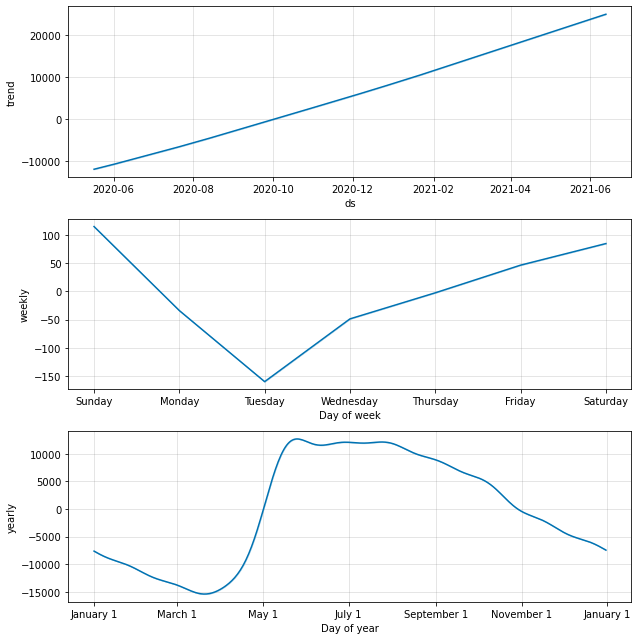

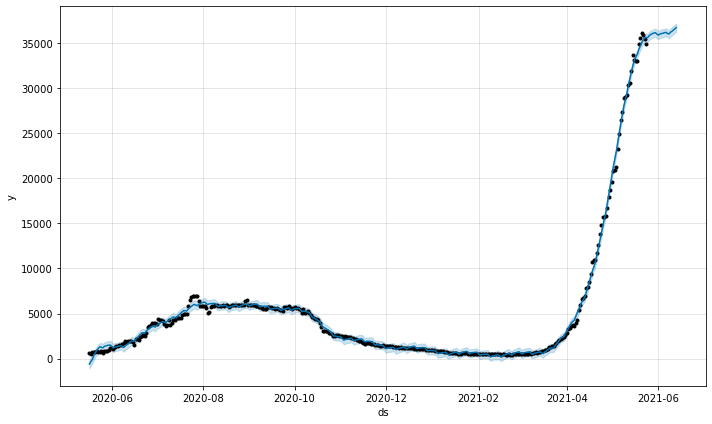

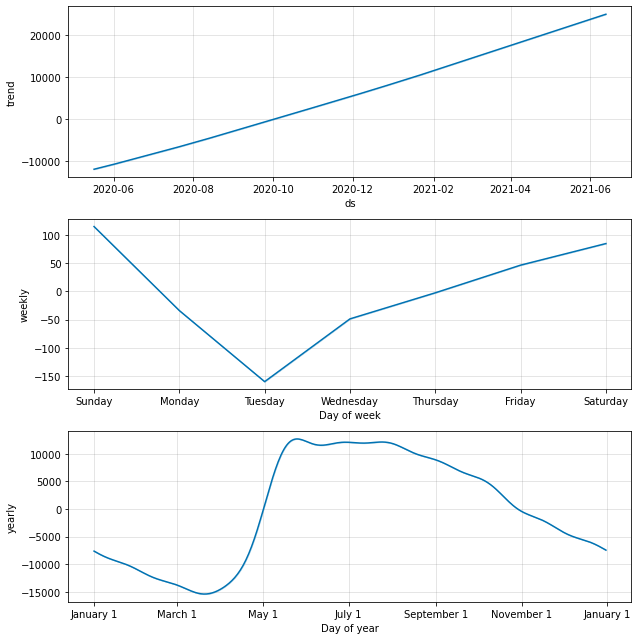

In [151]:
# prediction_size = 40
future = m.make_future_dataframe(periods=prediction_size)
forecast = m.predict(future)
forecast.head()

# Plot forecast
m.plot(forecast)

# Plot forecast's components
m.plot_components(forecast)

In [152]:
# Evaluate the model
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

cmp_df = make_comparison_dataframe(df, forecast)
cmp_df.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2020-05-17,-609.504737,-1108.132956,-141.297383,639.0
2020-05-18,-333.692157,-788.971290,145.757929,536.0
2020-05-19,-88.931394,-557.124227,354.465865,688.0
2020-05-20,339.948696,-120.107514,809.003774,743.0
2020-05-21,653.679520,188.495369,1097.019503,776.0


In [153]:
def calculate_forecast_errors(df, prediction_size):
    
    df = df.copy()
    
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    predicted_part = df[-prediction_size:]
    
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

MAPE nan
MAE nan


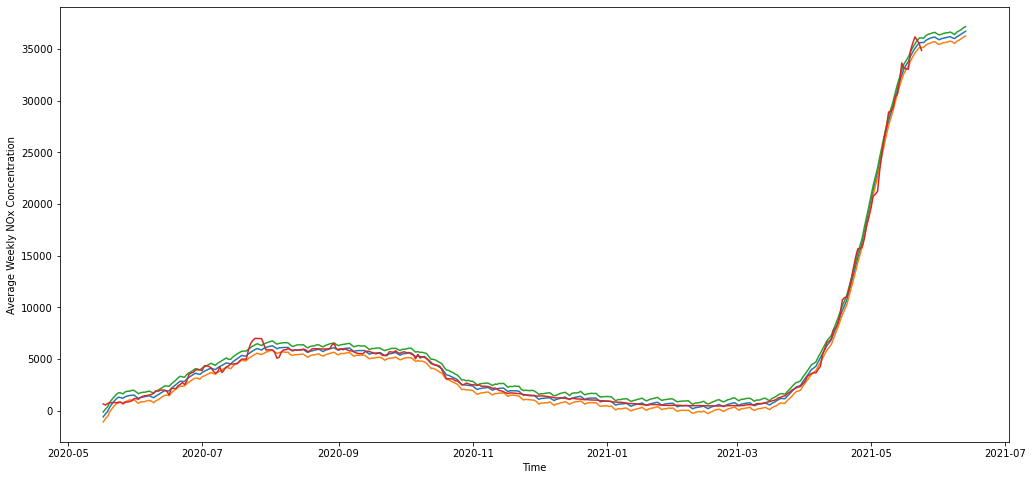

In [154]:
# Plot forecast with upper and lower bounds
plt.figure(figsize=(17, 8))
plt.plot(cmp_df['yhat'])
plt.plot(cmp_df['yhat_lower'])
plt.plot(cmp_df['yhat_upper'])
plt.plot(cmp_df['y'])
plt.xlabel('Time')
plt.ylabel('Average Weekly NOx Concentration')
plt.grid(False)
# plt.show()

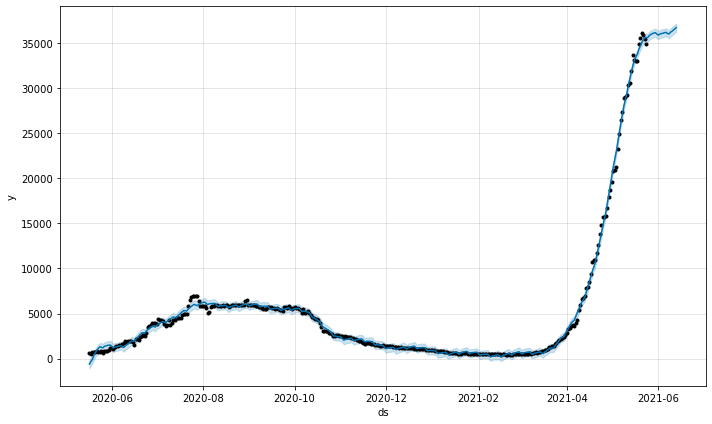

In [155]:
fig1 = m.plot(forecast)

In [17]:
data.keys()

dict_keys(['AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DL', 'DN', 'GA', 'GJ', 'HP', 'HR', 'JH', 'JK', 'KA', 'KL', 'LA', 'LD', 'MH', 'ML', 'MN', 'MP', 'MZ', 'NL', 'OR', 'PB', 'PY', 'RJ', 'SK', 'TG', 'TN', 'TR', 'TT', 'UN', 'UP', 'UT', 'WB'])

In [192]:
print(data['TN']['dates']['2021-05-24'])

{'delta': {'confirmed': 34867, 'deceased': 404, 'recovered': 27026, 'tested': 168194, 'vaccinated': 82627}, 'delta7': {'confirmed': 245920, 'deceased': 2867, 'recovered': 173069, 'tested': 1196274, 'vaccinated': 478009}, 'total': {'confirmed': 1877211, 'deceased': 20872, 'recovered': 1554759, 'tested': 26469766, 'vaccinated': 7473489}}


# Districtwise Analysis

In [217]:
response = requests.get("https://api.covid19india.org/v4/min/data-all.min.json")
data = response.json()
print(response.status_code)

200


In [218]:
# print(data.keys())

In [219]:
print(data['2021-05-24'].keys())

dict_keys(['AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DL', 'DN', 'GA', 'GJ', 'HP', 'HR', 'JH', 'JK', 'KA', 'KL', 'LA', 'LD', 'MH', 'ML', 'MN', 'MP', 'MZ', 'NL', 'OR', 'PB', 'PY', 'RJ', 'SK', 'TG', 'TN', 'TR', 'TT', 'UP', 'UT', 'WB'])


In [220]:
print(data['2021-05-24']['TN']['districts'].keys())

dict_keys(['Airport Quarantine', 'Ariyalur', 'Chengalpattu', 'Chennai', 'Coimbatore', 'Cuddalore', 'Dharmapuri', 'Dindigul', 'Erode', 'Kallakurichi', 'Kancheepuram', 'Kanyakumari', 'Karur', 'Krishnagiri', 'Madurai', 'Nagapattinam', 'Namakkal', 'Nilgiris', 'Perambalur', 'Pudukkottai', 'Railway Quarantine', 'Ramanathapuram', 'Ranipet', 'Salem', 'Sivaganga', 'Tenkasi', 'Thanjavur', 'Theni', 'Thiruvallur', 'Thiruvarur', 'Thoothukkudi', 'Tiruchirappalli', 'Tirunelveli', 'Tirupathur', 'Tiruppur', 'Tiruvannamalai', 'Vellore', 'Viluppuram', 'Virudhunagar'])


In [221]:
print(data['2021-05-24']['TN']['districts']['Chennai'].keys())

dict_keys(['delta', 'delta7', 'meta', 'total'])


In [222]:
print(data['2021-05-24']['TN']['districts']['Chennai']['delta'])

{'confirmed': 5047, 'deceased': 81, 'recovered': 5870, 'vaccinated': 21790}


In [223]:
print(data['2021-05-24']['TN']['districts']['Chennai']['meta'])

{'notes': '[July 22]: 444 backdated deceased entries added to Chennai in TN bulletin.', 'population': 7100000, 'tested': {'last_updated': '2021-02-01'}}


In [224]:
print(data['2021-05-24']['TN']['districts']['Chennai']['total'])

{'confirmed': 483757, 'deceased': 6460, 'recovered': 429146, 'tested': 2667777, 'vaccinated': 1849606}


In [225]:
def getDataDt(data, date, district):
#     print(date)
    dat = data[date]['TN']['districts'][district]['delta']
#     print(dat)
    try:
        return dat['deceased']
    except:
        return 0
getDataDt(data, '2021-05-24', 'Chennai')

# [getDataDt(data, d, district) for d in dates]

81

In [226]:
def getDataCt(data, date, district):
    dat = data[date]['TN']['districts'][district]['delta']
    return dat['confirmed']
getDataCt(data, '2021-05-24', 'Chennai')
    

5047

In [227]:
dates = list(data.keys())[108:]
confct = [getDataCt(data, d, district) for d in dates]
df = pd.DataFrame(list(zip(dates, confct)),
               columns =['Date', 'Confirmed cases'])
df['ravg'] = df['Confirmed cases'].rolling(rFact).mean()
df = df[6:]
df

,Date,Confirmed cases,ravg
6,2020-06-20,11,11.714286
7,2020-06-21,13,13.142857
8,2020-06-22,12,14.285714
9,2020-06-23,12,15.571429
10,2020-06-24,22,18.142857
...,...,...,...
340,2021-05-20,3342,3209.000000
341,2021-05-21,3251,3215.857143
342,2021-05-22,3168,3222.000000
343,2021-05-23,3949,3332.714286


In [204]:
dates = list(data.keys())[-(90+rFact):]
confct = [getDataCt(data, d, district) for d in dates]
Dect = [getDataDt(data, d, district) for d in dates]
df = pd.DataFrame(list(zip(dates, confct, Dect)),
               columns =['Date', 'Confirmed cases', 'deceased'])
df['ravgD'] = df['deceased'].rolling(rFact).mean()
df['ravg'] = df['Confirmed cases'].rolling(rFact).mean()

df = df[6:]
df

,Date,Confirmed cases,deceased,ravgD,ravg
6,2021-02-23,161,0,2.142857,147.571429
7,2021-02-24,185,3,2.571429,151.142857
8,2021-02-25,168,3,2.428571,152.714286
9,2021-02-26,164,2,2.285714,156.714286
10,2021-02-27,181,2,2.142857,165.571429
...,...,...,...,...,...
92,2021-05-20,5952,74,80.285714,6169.571429
93,2021-05-21,5814,109,85.142857,6094.142857
94,2021-05-22,5409,84,85.428571,5903.857143
95,2021-05-23,5039,81,88.285714,5759.857143


,Date,Confirmed cases
0,2020-06-14,1452
1,2020-06-15,1348
2,2020-06-16,1001
3,2020-06-17,1311
4,2020-06-18,1514
...,...,...
340,2021-05-20,5952
341,2021-05-21,5814
342,2021-05-22,5409
343,2021-05-23,5039


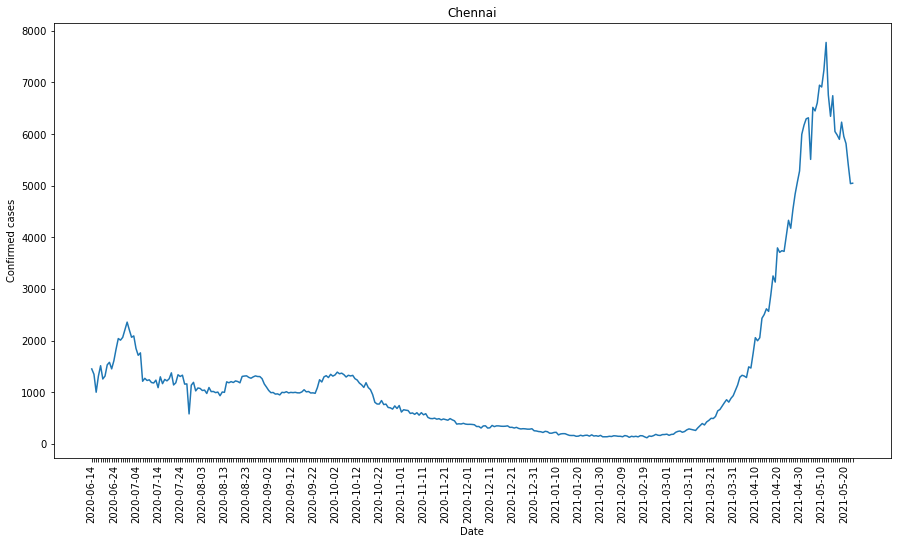

In [228]:

def districtPlot(district):
    confct = [getDataCt(data, d, district) for d in dates]

    df = pd.DataFrame(list(zip(dates, confct)),
                   columns =['Date', 'Confirmed cases'])
#     ax = sns.barplot(x="Date", y='Confirmed cases', data=df)

    ax = sns.lineplot(data=df, x="Date", y="Confirmed cases")
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 10 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    plt.title(district)
    plt.xticks(rotation=90)
#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.bar(dates,confct)
    return df
district = 'Chennai'
districtPlot(district)

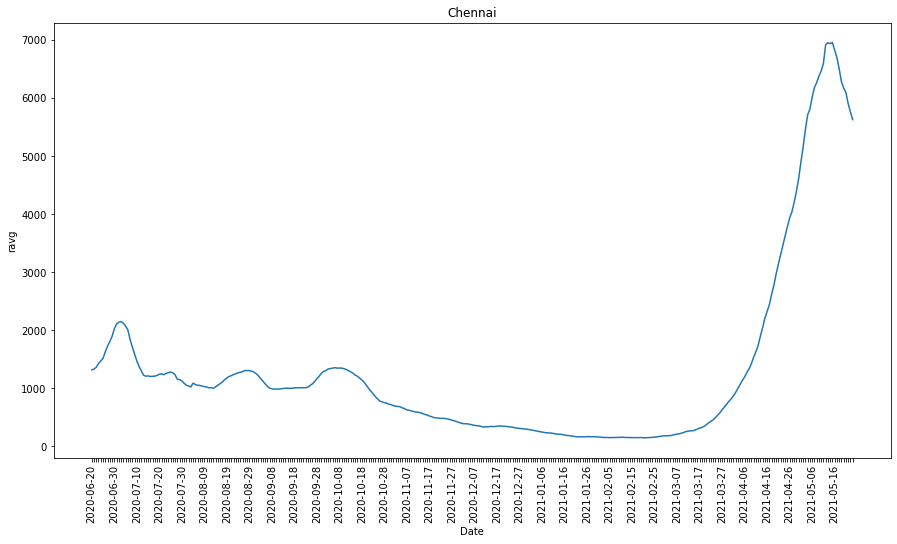

In [230]:

def districtPlotRavg(district):
    confct = [getDataCt(data, d, district) for d in dates]

    df = pd.DataFrame(list(zip(dates, confct)),
                   columns =['Date', 'Confirmed cases'])

    df['ravg'] = df['Confirmed cases'].rolling(rFact).mean()
    
    df = df[6:]
#     ax = sns.barplot(x="Date", y='Confirmed cases', data=df)

    ax = sns.lineplot(data=df, x="Date", y='ravg')
#     ax = sns.lineplot(data=df, x="Date", y='ravgD')
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 10 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    plt.title(district)
    plt.xticks(rotation=90)
#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.bar(dates,confct)
    return df
district = 'Chennai'
df1 = districtPlotRavg(district)

In [231]:

# def districtPlotRavgD(district):
#     confct = [getDataCt(data, d, district) for d in dates]

#     Dect = [getDataDt(data, d, district) for d in dates]
#     df = pd.DataFrame(list(zip(dates, confct, Dect)),
#                    columns =['Date', 'Confirmed cases', 'deceased'])
#     df['ravgD'] = df['deceased'].rolling(rFact).mean()
#     df['ravg'] = df['Confirmed cases'].rolling(rFact).mean()
    
#     df = df[6:]
# #     ax = sns.barplot(x="Date", y='Confirmed cases', data=df)

# #     ax = sns.lineplot(data=df, x="Date", y='ravg')
#     ax = sns.lineplot(data=df, x="Date", y='ravgD')
#     for ind, label in enumerate(ax.get_xticklabels()):
#         if ind % 10 == 0:  # every 10th label is kept
#             label.set_visible(True)
#         else:
#             label.set_visible(False)
#     plt.title(district)
#     plt.xticks(rotation=90)
# #     fig = plt.figure()
# #     ax = fig.add_axes([0,0,1,1])
# #     ax.bar(dates,confct)
#     return df
# district = 'Chennai'
# dfD1 = districtPlotRavgD(district)

,Date,Confirmed cases
0,2020-06-14,3
1,2020-06-15,4
2,2020-06-16,3
3,2020-06-17,4
4,2020-06-18,24
...,...,...
340,2021-05-20,3342
341,2021-05-21,3251
342,2021-05-22,3168
343,2021-05-23,3949


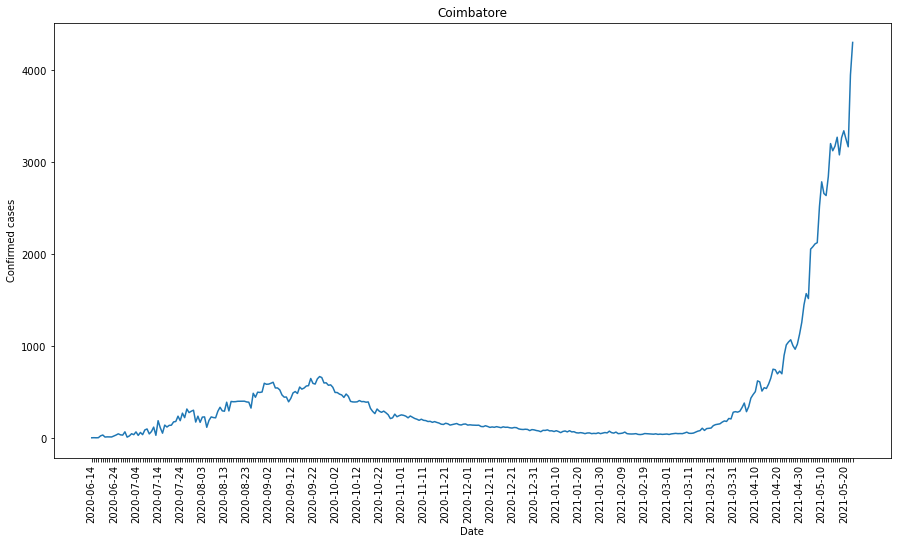

In [232]:
dates = list(data.keys())[108:]
district = 'Coimbatore'
districtPlot(district)

In [233]:
# district = 'Coimbatore'
# dfD2 = districtPlotRavgD(district)

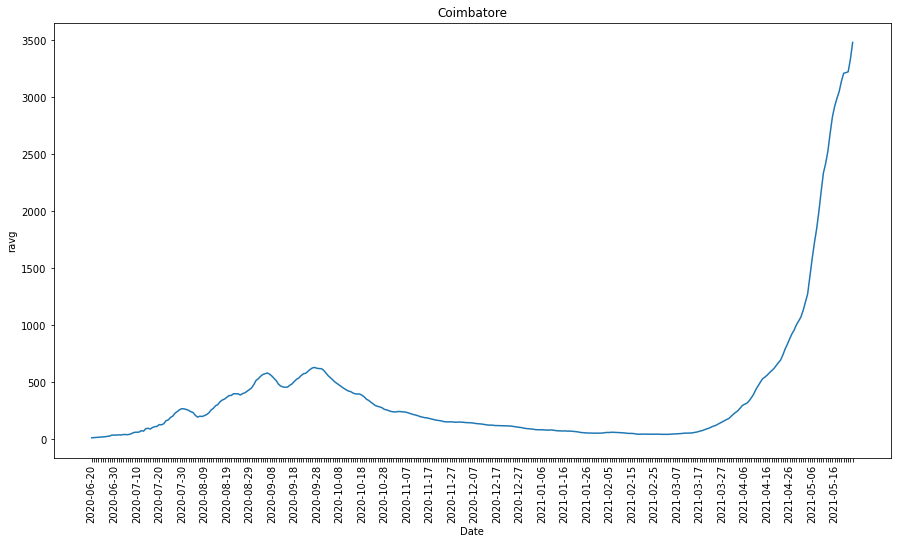

In [234]:
district = 'Coimbatore'
df2 = districtPlotRavg(district)

In [235]:
# district = 'Namakkal'
# districtPlot(district)

In [236]:
df1['ravg']

6      1313.857143
7      1325.142857
8      1358.285714
9      1422.857143
10     1465.428571
          ...     
340    6169.571429
341    6094.142857
342    5903.857143
343    5759.857143
344    5626.571429
Name: ravg, Length: 339, dtype: float64

In [237]:
df2['ravg']

6        11.714286
7        13.142857
8        14.285714
9        15.571429
10       18.142857
          ...     
340    3209.000000
341    3215.857143
342    3222.000000
343    3332.714286
344    3480.000000
Name: ravg, Length: 339, dtype: float64

Text(0.5, 1.0, 'Chennai Vs Coimbatore')

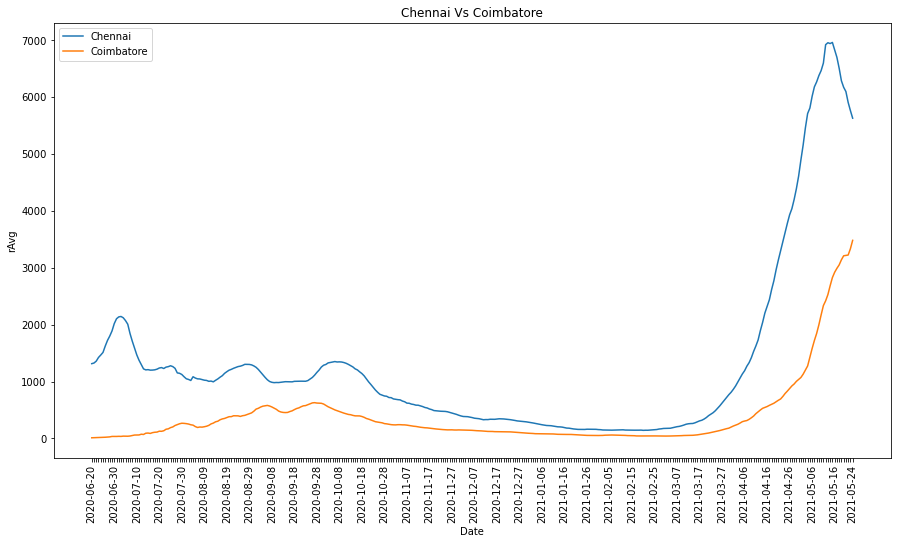

In [238]:
frame = {'Date':df1.Date, 'Chennai': df1['ravg'], 'Coimbatore': df2['ravg'] }
df = pd.DataFrame(frame)
ax = sns.lineplot(data=df, x="Date", y='Chennai', label = 'Chennai')
ax = sns.lineplot(data=df, x="Date", y='Coimbatore', label = 'Coimbatore')
plt.ylabel('rAvg')
plt.xticks(rotation=90)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
    if ind == len(dates)-7:
        label.set_visible(True)
plt.title('Chennai Vs Coimbatore')